<a href="https://colab.research.google.com/github/vijaygwu/MathematicsOfML/blob/main/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Simple Linear Regression*


Training with MSE loss function:
Iteration 100/1000, MSE Loss: 0.6588
Iteration 200/1000, MSE Loss: 0.3571
Iteration 300/1000, MSE Loss: 0.3098
Iteration 400/1000, MSE Loss: 0.2978
Iteration 500/1000, MSE Loss: 0.2915
Iteration 600/1000, MSE Loss: 0.2867
Iteration 700/1000, MSE Loss: 0.2827
Iteration 800/1000, MSE Loss: 0.2792
Iteration 900/1000, MSE Loss: 0.2763
Iteration 1000/1000, MSE Loss: 0.2739
Training R² Score: 0.5903
Testing R² Score: 0.5672

Training with MAE loss function:
Iteration 100/1000, MAE Loss: 1.1854
Iteration 200/1000, MAE Loss: 0.7645
Iteration 300/1000, MAE Loss: 0.6068
Iteration 400/1000, MAE Loss: 0.5666
Iteration 500/1000, MAE Loss: 0.5529
Iteration 600/1000, MAE Loss: 0.5453
Iteration 700/1000, MAE Loss: 0.5394
Iteration 800/1000, MAE Loss: 0.5346
Iteration 900/1000, MAE Loss: 0.5306
Iteration 1000/1000, MAE Loss: 0.5275
Training R² Score: 0.5713
Testing R² Score: 0.5487

Training with HUBER loss function:
Iteration 100/1000, HUBER Loss: 0.8473
Iteration 200

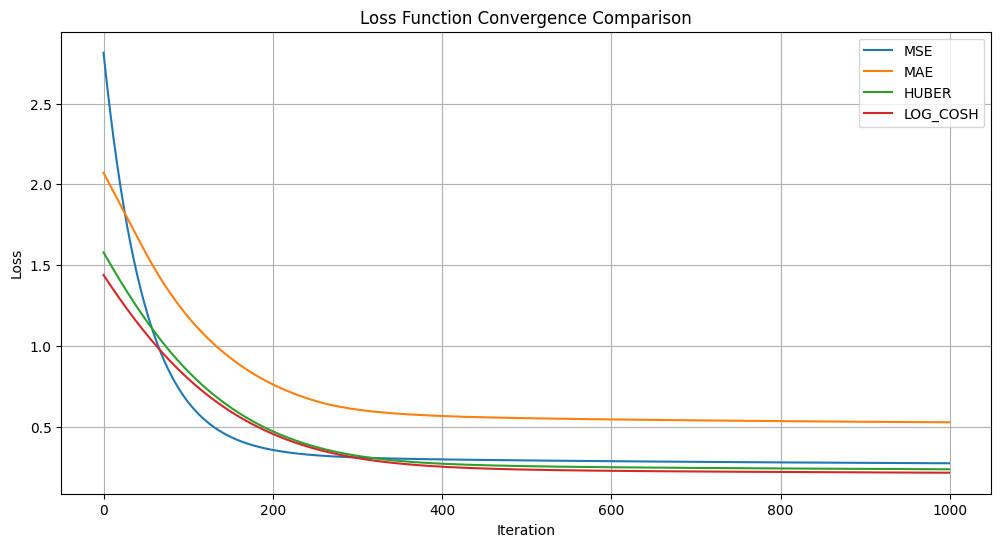

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000, loss_function='mse', epsilon=1.0):
        """
        Initialize Linear Regression with choice of loss function

        Parameters:
        - loss_function: str, options: 'mse', 'mae', 'huber', 'log_cosh'
        - epsilon: float, parameter for Huber loss
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.loss_function = loss_function
        self.epsilon = epsilon
        self.weights = None
        self.bias = None
        self.cost_history = []

    def _initialize_parameters(self, n_features):
        """Initialize weights and bias to zeros"""
        self.weights = np.zeros(n_features)
        self.bias = 0

    def _compute_prediction(self, X):
        """Compute predictions using current weights and bias"""
        return np.dot(X, self.weights) + self.bias

    def _mse_loss(self, y, y_pred):
        """Mean Squared Error loss"""
        m = len(y)
        cost = (1/(2*m)) * np.sum((y_pred - y) ** 2)
        gradient = (1/m) * (y_pred - y)
        return cost, gradient

    def _mae_loss(self, y, y_pred):
        """Mean Absolute Error loss"""
        m = len(y)
        cost = (1/m) * np.sum(np.abs(y_pred - y))
        gradient = (1/m) * np.sign(y_pred - y)
        return cost, gradient

    def _huber_loss(self, y, y_pred):
        """Huber loss - combines MSE and MAE"""
        m = len(y)
        error = y_pred - y
        is_small_error = np.abs(error) <= self.epsilon

        # Calculate cost
        squared_loss = 0.5 * (error ** 2)
        linear_loss = self.epsilon * np.abs(error) - 0.5 * (self.epsilon ** 2)
        cost = np.mean(np.where(is_small_error, squared_loss, linear_loss))

        # Calculate gradient
        gradient = np.where(is_small_error, error, self.epsilon * np.sign(error)) / m
        return cost, gradient

    def _log_cosh_loss(self, y, y_pred):
        """Log-cosh loss"""
        m = len(y)
        error = y_pred - y
        cost = np.sum(np.log(np.cosh(error))) / m
        gradient = np.tanh(error) / m
        return cost, gradient

    def _compute_loss_and_gradient(self, y, y_pred):
        """Compute loss and gradient based on selected loss function"""
        if self.loss_function == 'mse':
            return self._mse_loss(y, y_pred)
        elif self.loss_function == 'mae':
            return self._mae_loss(y, y_pred)
        elif self.loss_function == 'huber':
            return self._huber_loss(y, y_pred)
        elif self.loss_function == 'log_cosh':
            return self._log_cosh_loss(y, y_pred)
        else:
            raise ValueError(f"Unknown loss function: {self.loss_function}")

    def _compute_gradients(self, X, y, y_pred):
        """Compute gradients for weights and bias"""
        m = X.shape[0]
        _, gradient = self._compute_loss_and_gradient(y, y_pred)
        dw = np.dot(X.T, gradient)
        db = np.sum(gradient)
        return dw, db

    def fit(self, X, y):
        """Train the model using gradient descent"""
        self._initialize_parameters(X.shape[1])

        for i in range(self.n_iterations):
            # Compute predictions
            y_pred = self._compute_prediction(X)

            # Compute cost and gradients
            cost, _ = self._compute_loss_and_gradient(y, y_pred)
            dw, db = self._compute_gradients(X, y, y_pred)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store cost
            self.cost_history.append(cost)

            # Print progress
            if (i + 1) % 100 == 0:
                print(f'Iteration {i + 1}/{self.n_iterations}, {self.loss_function.upper()} Loss: {cost:.4f}')

    def predict(self, X):
        """Make predictions on new data"""
        return self._compute_prediction(X)

    def score(self, X, y):
        """Compute R-squared score"""
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

# Load and prepare data
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models with different loss functions
loss_functions = ['mse', 'mae', 'huber', 'log_cosh']
results = {}

for loss_fn in loss_functions:
    print(f"\nTraining with {loss_fn.upper()} loss function:")
    model = LinearRegressionScratch(learning_rate=0.01, n_iterations=1000, loss_function=loss_fn)
    model.fit(X_train_scaled, y_train)

    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    results[loss_fn] = {
        'train_score': train_score,
        'test_score': test_score,
        'cost_history': model.cost_history
    }

    print(f"Training R² Score: {train_score:.4f}")
    print(f"Testing R² Score: {test_score:.4f}")

# Plot convergence comparison
plt.figure(figsize=(12, 6))
for loss_fn in loss_functions:
    plt.plot(results[loss_fn]['cost_history'], label=loss_fn.upper())
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Convergence Comparison')
plt.legend()
plt.grid(True)
plt.show()